> **Tip**: In this project, we will analyze a dataset containing information about movies from TMDb (The Movie Database). We will explore the data to answer various questions and gain insights into the trends and patterns in the movie industry.

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.


### Dataset Description 

> **Tip**: When introducing your dataset, it's essential to provide a clear overview of its contents and significance. Begin by stating the source of the dataset and its relevance to your analysis. Then, list all the column names in each table, explaining their significance to help readers understand the type of information available.


### Question(s) for Analysis
>**Tip**: How does the budget of a movie influence its revenue, and what are the most common genres of movies produced? Additionally, is there a correlation between the runtime of a movie and its average rating? These questions will be explored throughout the report using data analysis techniques.

> **Tip**: When coding, it's important to adhere to good coding practices such as using NumPy arrays, Pandas Series, and DataFrames where appropriate, instead of relying solely on Python lists and dictionaries. Additionally, defining and using functions can help avoid repetitive code and improve code readability. 


In [10]:
#loading necessary libraries

import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section, we'll load the data, check for any issues, and clean it for analysis. We'll document each cleaning step in markdown cells to ensure transparency and justify our decisions.


### General Properties
> **Tip**: Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell.

In [11]:
# Load your data

data = pd.read_csv('tmdb_5000_movies.csv')

<a id='wrangling'></a>
## Printing the Data's data type and dimensions

> The TMdb dataset consists of 4803 rows and 20 columns.


In [12]:
print(data.shape)

(4803, 20)


<a id='wrangling'></a>
## Printing data columns


> Lets find out the name of the columns for this dataset.


In [13]:
print(list(data.columns.values))

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


<a id='wrangl'></a>
## Inspecting the 10 first rows from the Data


> Here it is presented the first 10 rows from the TMdb dataset, Lets look at each column. There are id columns as a unique value corresponding to each row - entry, which on its side represents each movie. There are other columns which describes financial values such budget and revenue. Other columns include information like the genre of this movie, the production companies, the release_date, the crowd's votes.


In [14]:
data.head(11)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [15]:
Calculating the null value

SyntaxError: invalid syntax (208047140.py, line 1)

In [16]:
#data has null values so we count total rows in each column which contain null values
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [17]:
#fill the null values with zero using 'fillna' function
df2=data.fillna(0)


### Data Cleaning (Removing the unused information from the dataset )

 

In [18]:
%config IPCompleter.greedy=True


In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [20]:
data = data[data["overview"].isnull() == False]
data = data[data["genres"].isnull() == False]

data = data[data.vote_average != 0]
data = data[data.vote_count != 0]

### 1-remove duplicate rows from the dataset


In [21]:
#counting the duplicates 
sum(df2.duplicated())

0

In [22]:
#drop these duplicated rows 
df2.drop_duplicates(inplace=True)
df2.shape

(4803, 20)

### 2- remove the unused colums that are not needes in the analysis process


In [23]:
#The columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis
#I will drop these columns
df2.drop(['homepage','tagline','overview','budget','revenue'],axis =1,inplace = True)

In [24]:
df2.shape


(4803, 15)

### 3- changing Datetime Format


In [25]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format
converted_date_str = df2.replace("-", "/")
print(converted_date_str)  # Output: 2009/12/10

                                                 genres      id  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
...                                                 ...     ...   
4798  [{"id": 28, "name": "Action"}, {"id": 80, "nam...    9367   
4799  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   72766   
4800  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...  231617   
4801                                                 []  126186   
4802                [{"id": 99, "name": "Documentary"}]   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id


### Descriptive Statistics

> **Tip**: In this section basic descriptive statistics are being presented for each column from the dataset.

 

In [26]:
########################################
###basic descriptive statistics
####################################

data.describe()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.738000e+03,4738.000000,4738.000000,4.738000e+03,4738.000000,4738.000000,4738.000000
mean,2.943842e+07,54298.141410,21.784912,8.338916e+07,107.285564,6.172647,699.682566
std,4.086051e+07,84752.013154,31.935256,1.636834e+08,21.978777,0.972588,1240.361433
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.500000,1.000000
25%,1.000000e+06,8971.250000,4.982935,0.000000e+00,94.000000,5.600000,58.000000
50%,1.500000e+07,14358.500000,13.295098,2.000000e+07,104.000000,6.200000,242.000000
75%,4.000000e+07,55537.000000,28.670406,9.452796e+07,118.000000,6.800000,750.750000
max,3.800000e+08,426469.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which year has the highest release of movies?


In [27]:
# Convert 'release_date' column to datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

# Extract year from the 'release_date' column and create a new column 'release_year'
data['release_year'] = data['release_date'].dt.year

# Display the modified DataFrame
print(data.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [28]:
#count the number of movies in each year 
df1=data.groupby('release_year').count()['id']

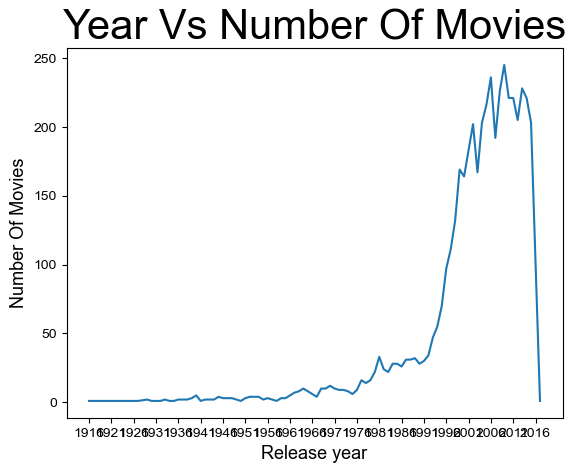

In [29]:
df1.plot(xticks = np.arange(1916,2017,5))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year Vs Number Of Movies",fontsize = 30)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

### After Seeing the plot and the output we can conclude that year 2008 year has the highest release of movies

The number of movies released in the United States has fluctuated over the years, but there is an overall upward trend.
The number of movies released reached a peak of around 250 in the late 1930s and early 1940s.
There was a decline in the number of movies released in the 1950s and 1960s, followed by a sharp increase in the 1970s and 1980s.
The number of movies released has remained relatively stable since the early 1990s.


### Research Question 2  (Which Month Released Highest Number Of Movies In All Of The Years?)

In [33]:
number_of_release=data['release_date'].dt.month.value_counts().sort_index()
number_of_release

release_date
1     373
2     325
3     365
4     343
5     358
6     383
7     359
8     410
9     581
10    464
11    325
12    452
Name: count, dtype: int64

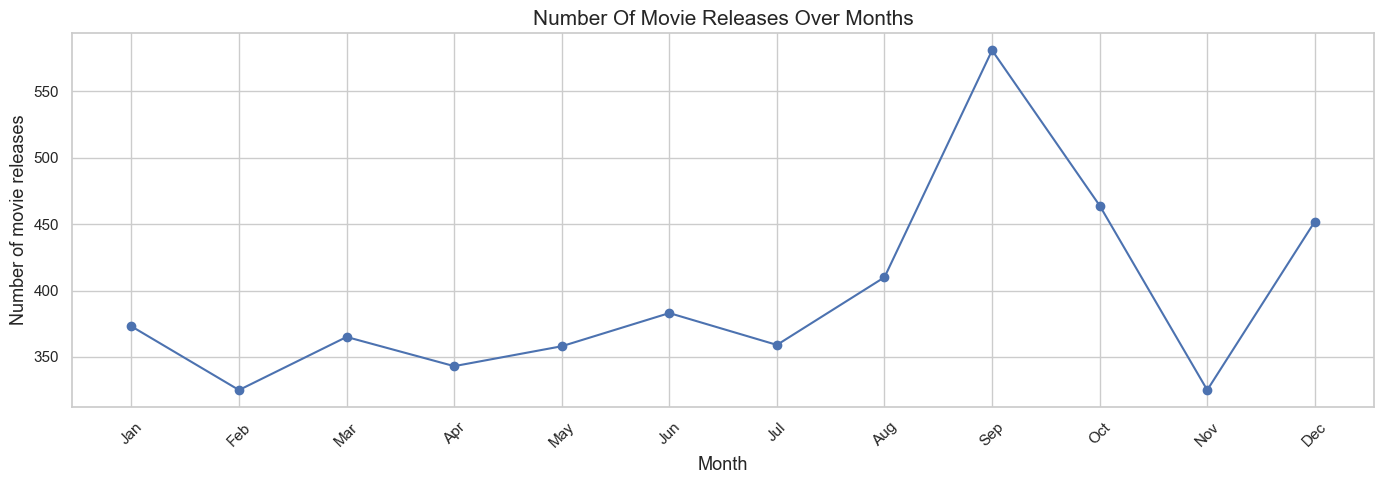

In [34]:
# Define months list
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a DataFrame from number_of_release Series
number_of_release_df = pd.DataFrame({'month': months, 'number_of_release': number_of_release.values})

# Plotting
plt.plot(number_of_release_df['month'], number_of_release_df['number_of_release'], marker='o', linestyle='-')

# Set labels and title
plt.title('Number Of Movie Releases Over Months', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Number of movie releases', fontsize=13)

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### According to the plot we can conclude that there are higher number of release in september and october month.


### Research Question 3  (Movie with Largest And Lowest Earned Revenue?)

In [35]:
def find_minmax_revenue(data):
    # Find the index of the movie with the lowest and highest revenue
    min_revenue_index = data['revenue'].idxmin()
    max_revenue_index = data['revenue'].idxmax()
    
    # Get the details of the movies with the lowest and highest revenue
    min_revenue_movie = data.loc[min_revenue_index]
    max_revenue_movie = data.loc[max_revenue_index]
    
    # Create a DataFrame containing details of both movies
    minmax_revenue_df = pd.DataFrame({'Lowest Revenue Movie': min_revenue_movie, 'Highest Revenue Movie': max_revenue_movie})
    
    return minmax_revenue_df

In [36]:
# Call the function to find movies with the highest and lowest revenue
minmax_revenue_df = find_minmax_revenue(data)

# Display the DataFrame
print(minmax_revenue_df)

                                                   Lowest Revenue Movie  \
budget                                                         27000000   
genres                [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
homepage                                                            NaN   
id                                                                79698   
keywords                                                             []   
original_language                                                    en   
original_title                                               The Lovers   
overview              The Lovers is an epic romance time travel adve...   
popularity                                                     2.418535   
production_companies  [{"name": "Corsan", "id": 7299}, {"name": "Bli...   
production_countries  [{"iso_3166_1": "AU", "name": "Australia"}, {"...   
release_date                                        2015-02-13 00:00:00   
revenue                  

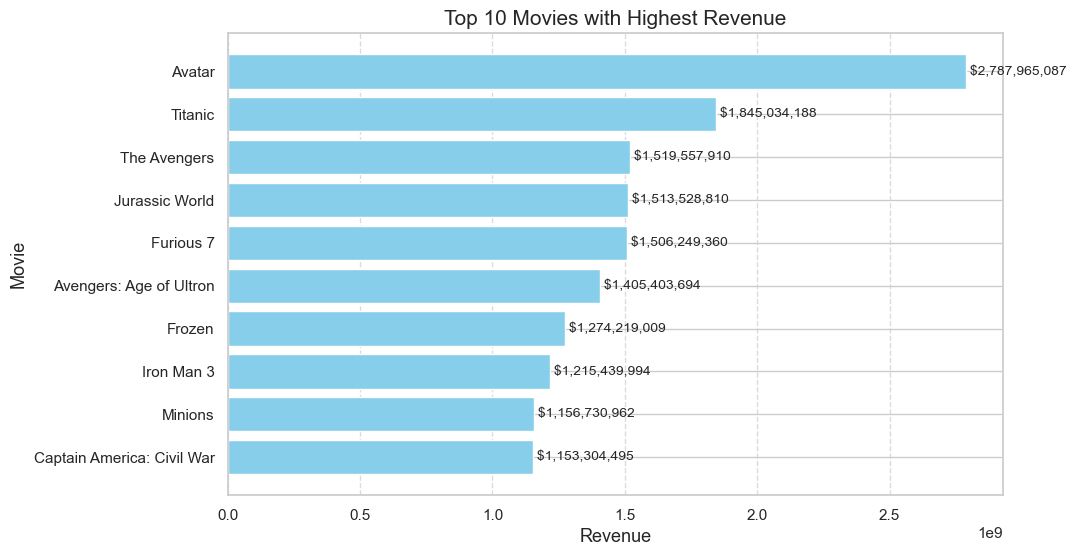

In [38]:
# Sort the 'revenue' column in descending order and store it in a new DataFrame
top_10_revenue = data[['original_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_revenue['original_title'], top_10_revenue['revenue'], color='skyblue')
plt.xlabel('Revenue', fontsize=13)
plt.ylabel('Movie', fontsize=13)
plt.title('Top 10 Movies with Highest Revenue', fontsize=15)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest revenue movie on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with revenue values
for index, value in enumerate(top_10_revenue['revenue']):
    plt.text(value, index, f' ${value:,.0f}', fontsize=10, va='center')

# Show plot
plt.show()

### As we can see that 'Avatar' movie earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is Titanic.


<a id='conclusions'></a>
## Conclusions

so, after processing this data set we can conclude the following :

### 1- we can conclude that year 2008 year has the highest release of movies

### 2- the higher number of release in september and october month

### 3- 'Avatar' movie earn the highest profit in all, making over 2.5B in profit in this dataset


And the most in loss movie in this dataset is The Warrior's Way. 5-the Movie Which Has Highest budget is The Warrior's Way and the Movie Which Has Lowest budget is Fear Clinic 6-we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies. 7-movie with high popularity tends to earn high profit.

### Limitations

The provided data might have inconsistencies due to: 
1) missing currency units in the budget and revenue columns, potentially causing inaccurate comparisons across movies with different production countries, and 
2) the time-consuming process of splitting data into lists during cleaning, which can impact overall analysis efficiency.


In [53]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

zsh:1: command not found: python
